# 📦 MiniLab – E-commerce Analytics

**Projeto:** Análise de entregas de uma empresa global de e-commerce.  
**Objetivo:** Investigar padrões e possíveis causas para o **atraso nas entregas**, com base em dados operacionais e logísticos de pedidos realizados em diferentes partes do mundo.

**Base de Dados:**  
Conjunto de dados **sintético**, representando transações reais de e-commerce, incluindo informações sobre envio, produto, avaliação do cliente e performance de entrega.  
A variável-alvo `entregue_no_prazo` indica se o pedido foi entregue pontualmente (`1`) ou com atraso (`0`).

---

Este notebook faz parte do ciclo de desenvolvimento do **Small Data Lab**, com foco em estatística aplicada e exploração de dados com Python.


## 📥 1. Carregamento e Pré-processamento dos Dados

Nesta etapa inicial, realizaremos a importação das bibliotecas necessárias, leitura da base de dados e uma prévia avaliação do seu conteúdo.  
O objetivo é garantir que os dados estejam prontos para análise, identificando tipos de variáveis, valores ausentes, possíveis inconsistências e a estrutura geral do dataset.


### 📚 1.1 – Importação das Bibliotecas

Importação das bibliotecas necessárias para a análise exploratória de dados e visualização gráfica:

- `pandas` e `numpy` para manipulação de dados e operações numéricas;
- `matplotlib.pyplot` e `seaborn` para criação de gráficos;
- `pathlib` para manipulação robusta de caminhos de arquivos;
- `rcParams` do `matplotlib` para ajuste global de estilo dos gráficos, como tamanho, espessura de linhas e tamanho das fontes.


In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from pathlib import Path

# Parâmetros de configuração dos gráficos
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### 📦 1.2 – Carregamento do Dataset

Leitura do arquivo `dataset.csv`, que contém registros transacionais de uma empresa global de comércio eletrônico.  
O conjunto de dados é **sintético**, mas foi estruturado para simular um ambiente realista de vendas, incluindo informações sobre frete, avaliação do cliente, meio de transporte, descontos aplicados, entre outros atributos logísticos e operacionais.

O uso da biblioteca `pathlib` proporciona maior flexibilidade e portabilidade no acesso ao arquivo, permitindo que o notebook seja executado em diferentes estruturas de diretório com facilidade.

In [2]:
# 📂 Definição do diretório base do projeto
base_dir = Path().resolve().parent  # Caminho até a pasta principal do projeto

# 📁 Caminho completo até o arquivo CSV de entrada
input_csv = base_dir /'data/dataset.csv'

# # 📄 Leitura do dataset
df = pd.read_csv(input_csv)

### 👁️‍🗨️ 1.3 – Prévia da Base de Dados

A seguir, é realizada uma inspeção inicial da estrutura do dataset, seguindo uma ordem progressiva de leitura e compreensão dos dados:

- `df.shape`: exibe a dimensão da base (número de linhas e colunas);
- `df.columns`: lista os nomes de todas as colunas disponíveis;
- `df.head()`: apresenta as primeiras linhas da base para observar os valores iniciais;
- `df.info()`: resume os tipos de dados, a quantidade de valores não nulos e o uso de memória;
- `df.describe()`: fornece estatísticas descritivas básicas para as variáveis numéricas.

Essa sequência facilita o entendimento gradual da estrutura dos dados antes de avançar para etapas mais específicas da análise.


In [3]:
df.shape

(11000, 12)

In [4]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [5]:
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df.describe()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,5500.500000,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455,0.596636
std,3175.570815,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722,0.490595
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.750000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000,0.000000
50%,5500.500000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8250.250000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,11000.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## 🔍 2. Análise Exploratória dos Dados

### 🧮 2.1 – Separação de Variáveis Categóricas e Numéricas

Nesta etapa, separam-se as variáveis do dataset entre **categóricas** e **numéricas**, levando em consideração não apenas o tipo técnico (`dtype`), mas também o **significado prático (semântico)** de cada coluna.

> ⚠️ Algumas colunas numéricas não devem ser tratadas como quantitativas:
>
> - `ID`: identificador único do cliente, sem valor estatístico.
> - `Entregue no Prazo`: variável-alvo da análise (0 = não, 1 = sim), que será tratada separadamente.

Por isso, ambas são **removidas da lista de variáveis numéricas**, mesmo apresentando tipo `int`.

- **Variáveis categóricas**: colunas do tipo `object`, que representam atributos qualitativos.
- **Variáveis numéricas**: colunas `int` ou `float` que indicam medidas quantitativas (como preço, peso, tempo de envio, etc).

Essa separação é essencial para as próximas etapas da análise estatística e visual.

In [8]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [9]:
# Variáveis identificadas automaticamente por tipo
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include='number').columns.tolist()

# Ajustes manuais com base no significado das variáveis
remove_from_num = ['ID', 'entregue_no_prazo']
num_cols = [col for col in num_cols if col not in remove_from_num]

# Definindo a variável-alvo
target = ['entregue_no_prazo']

# Exibindo o resultado
print(f"Variáveis categóricas: {cat_cols}")
print(f"Variáveis numéricas: {num_cols}")
print(f"Variável alvo: {target}")

Variáveis categóricas: ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']
Variáveis numéricas: ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores', 'desconto', 'peso_gramas']
Variável alvo: ['entregue_no_prazo']


### 📊 2.2 – Estatísticas Descritivas das Variáveis Numéricas

A seguir, apresenta-se um resumo estatístico das variáveis numéricas do dataset, com foco em medidas de tendência central (média, mediana) e dispersão (desvio padrão, mínimo, máximo e quartis). Essa etapa permite identificar padrões gerais, assimetrias e potenciais outliers.

In [10]:
# Estatísticas descritivas das variáveis numéricas
df[num_cols].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


#### 📝 Observações iniciais:

1. As variáveis `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` demonstram **distribuições simétricas**, com média e mediana próximas.
2. As variáveis `compras_anteriores` e `desconto` apresentam **assimetria à direita**, com média visivelmente superior à mediana.
3. A variável `peso_gramas` parece apresentar **assimetria à esquerda**, sugerindo que parte significativa dos produtos tem peso superior à média.


### 📊 2.3 – Exploração das Variáveis Categóricas

A seguir, é apresentado um resumo estatístico das variáveis categóricas, considerando frequências, valores únicos e classes dominantes

In [11]:
# Resumo das variáveis categóricas
df[cat_cols].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


---

> 📝 **Observações**
>
> - Para a variável `corredor_armazem`, a classe dominante é **F**.  
> - Para `modo_envio`, a classe dominante é **Navio**.  
> - Para `prioridade_produto`, a classe dominante é **baixa**.  
> - Para `genero`, a classe dominante é **F (Feminino)**.  
> - Todas as variáveis categóricas possuem entre **2 e 5 valores únicos**, o que favorece análises visuais e codificação eficiente.

---


### 📊 2.3 Frequência de Categorias

Nesta etapa, são listadas as frequências absolutas (número de registros) de cada categoria presente nas variáveis qualitativas (categóricas).

A visualização da distribuição de categorias auxilia na identificação de **classes dominantes**, **valores raros** e possíveis **inconsistências** nos dados.

---


In [12]:
#from IPython.display import display

for col in cat_cols:
    print(f"\n🔸 Distribuição da variável: {col}")
    display(df[col].value_counts().to_frame("Frequência"))



🔸 Distribuição da variável: corredor_armazem


,Frequência
corredor_armazem,
F,3666
D,1834
C,1834
A,1833
B,1833



🔸 Distribuição da variável: modo_envio


,Frequência
modo_envio,
Navio,7463
Aviao,1777
Caminhao,1760



🔸 Distribuição da variável: prioridade_produto


,Frequência
prioridade_produto,
baixa,5298
media,4754
alta,948



🔸 Distribuição da variável: genero


,Frequência
genero,
F,5546
M,5454


#### 📦 2.4 – Distribuição com Boxplots

Nesta etapa, são utilizados **boxplots** para visualizar a distribuição das variáveis numéricas e identificar padrões de dispersão, assimetria e **presença de outliers**.

- Cada gráfico representa uma variável numérica individualmente.
- A linha horizontal dentro da caixa indica a **mediana**.
- Os limites da caixa representam o **1º e o 3º quartis**.
- Os pontos fora dos limites dos "bigodes" são considerados **valores discrepantes (outliers)**.

Essa visualização é útil para detectar variáveis com **assimetria** relevante ou **dispersão acentuada**, o que pode impactar etapas posteriores da análise.


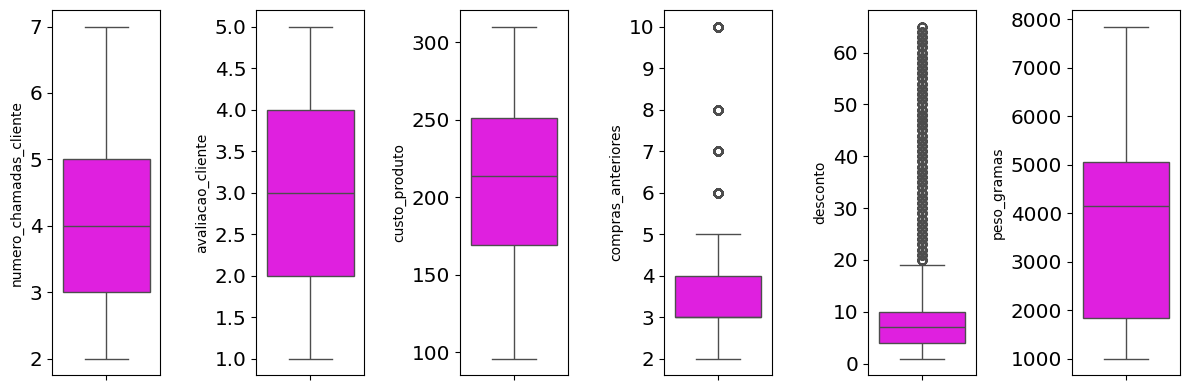

In [13]:
features = num_cols
for i in range(0, len(features)):
    plt.subplot(1, len( features), i + 1)
    sns.boxplot( y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

### 📊 2.5 – Histograma com Curva de Densidade (KDE)

Nesta etapa, são utilizados **histogramas** acompanhados de curvas de densidade (KDE) para examinar a **distribuição empírica** de cada variável numérica.

- O histograma mostra a **frequência de valores** em intervalos definidos.
- A curva KDE (Kernel Density Estimation) suaviza a distribuição, facilitando a identificação da **forma da curva** (simétrica, assimétrica à direita/esquerda etc.).
- Essa abordagem permite uma avaliação visual da **normalidade** e do **comportamento de cauda** de cada variável.

A combinação de histograma + KDE é útil para compreender padrões de distribuição antes de aplicar técnicas estatísticas mais robustas.

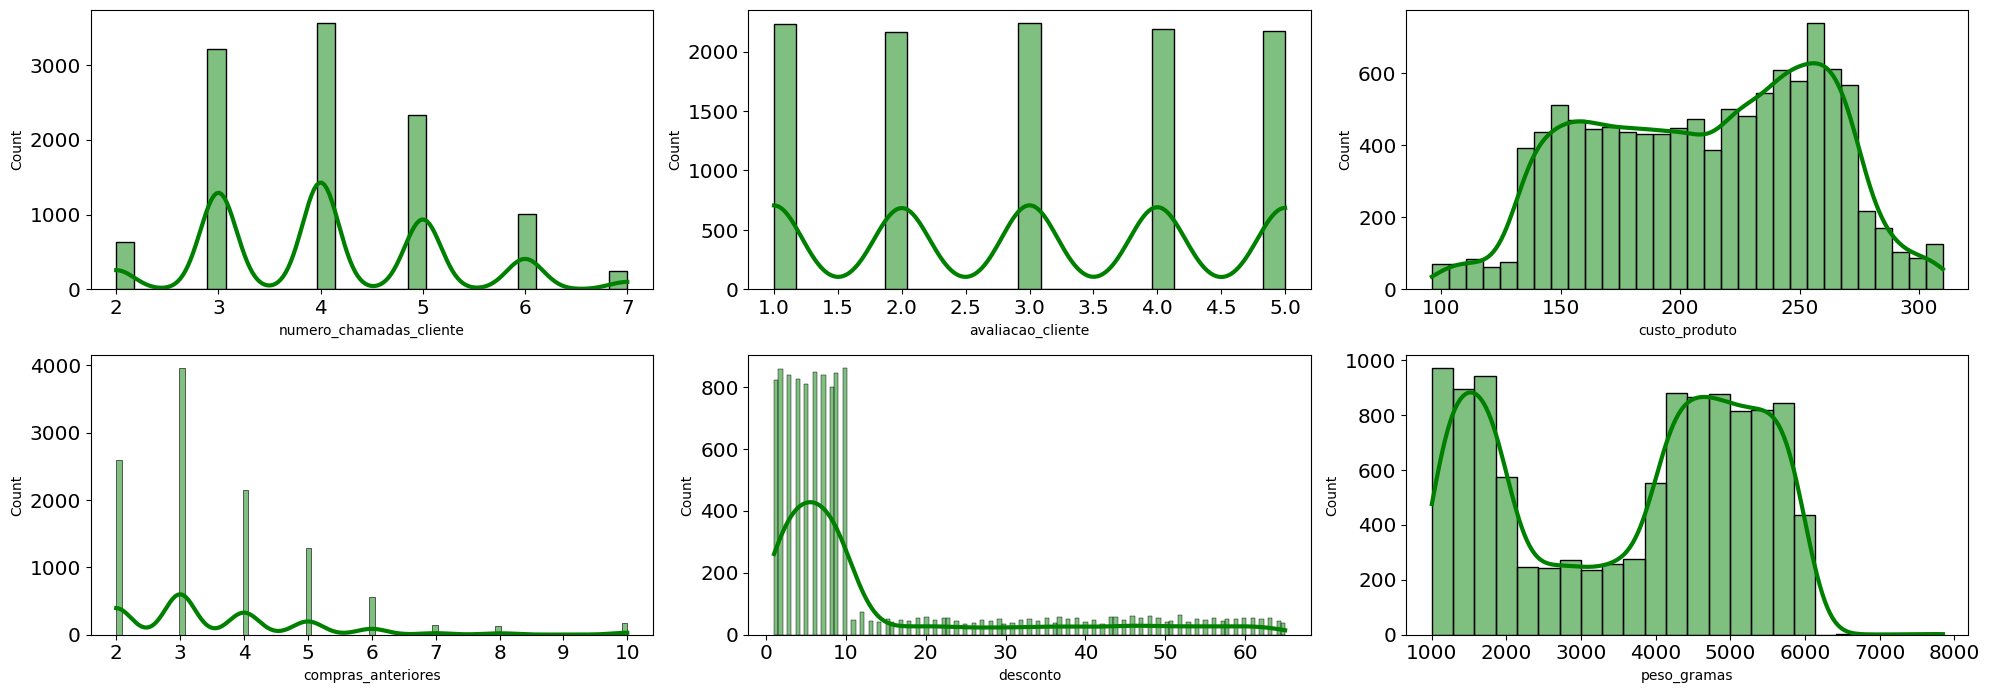

In [14]:
features = num_cols
plt.figure(figsize = (20, 10))
for i in range (0, len(num_cols)):
    plt.subplot(3, len(num_cols)// 2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

### 🎻 2.6 – Violin Plots (Distribuição + Densidade)

Nesta etapa, são utilizados **violin plots** para explorar a distribuição das variáveis numéricas de forma mais rica.

- O violin plot combina elementos do **boxplot** com a **curva de densidade KDE**, permitindo visualizar tanto os quartis quanto o **formato completo da distribuição**.
- É especialmente útil para detectar **assimetrias**, **multimodalidade** (mais de um pico) e **variações na densidade dos dados**.
- A visualização vertical permite comparar rapidamente a **forma e a dispersão** entre diferentes variáveis numéricas.

Essa abordagem enriquece a interpretação visual e oferece mais contexto do que boxplots ou histogramas isolados.

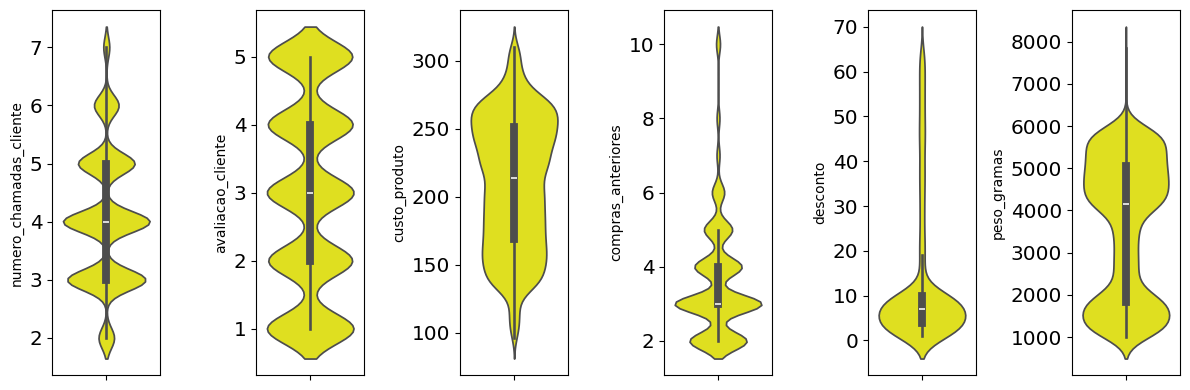

In [15]:
for i in range( 0, len(num_cols)):
    plt.subplot(1, len(num_cols), i+1)
    sns.violinplot(y = df[num_cols[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

> 📌 **Observações a partir dos gráficos:**
>
>- A variável `custo_produto` apresenta uma distribuição próxima da **normal**, com leve simetria.
>- As variáveis `compras_anteriores` e `desconto` demonstram **assimetria à direita**, indicando possível necessidade de **transformações futuras**.
>- A distribuição da variável `peso_gramas` tem formato de **U**, sugerindo **bimodalidade** ou agrupamentos distintos.
>- As variáveis `numero_chamadas_cliente` e `avaliacao_cliente` exibem distribuição **quase uniforme**, sem concentração evidente em faixas específicas.

### 📊 2.7 Análise Univariada – Countplot (Variáveis Categóricas)

Nesta etapa, são gerados **gráficos de barras (countplots)** para uma amostra representativa do conjunto de dados, com o objetivo de visualizar a distribuição das **variáveis categóricas**.

A amostragem de 1.000 registros com `random_state=42` foi utilizada para **melhorar o desempenho da renderização** sem comprometer a representatividade dos dados.

Os countplots facilitam a identificação de:

- Classes dominantes em cada variável;
- Possíveis desbalanceamentos;
- Distribuição geral das categorias.


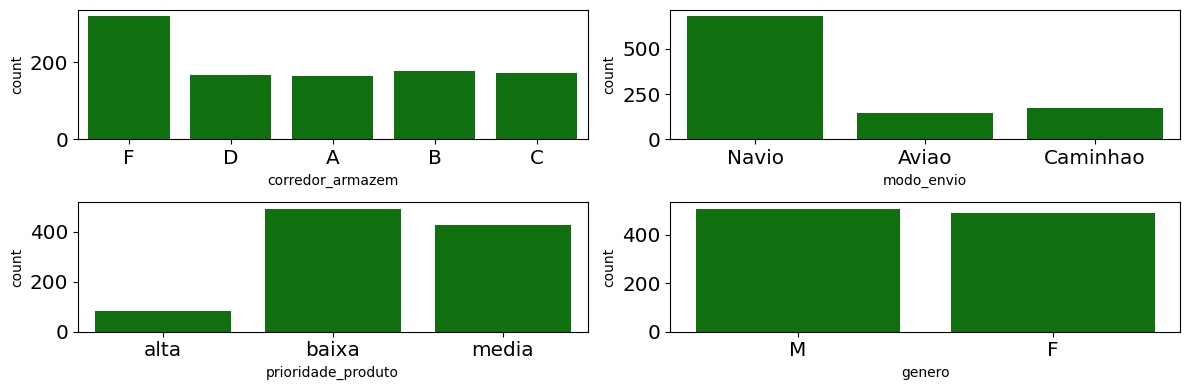

In [16]:
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x = df_sample[cat_cols[i]], color = "green", orient = 'v')
    plt.tight_layout()

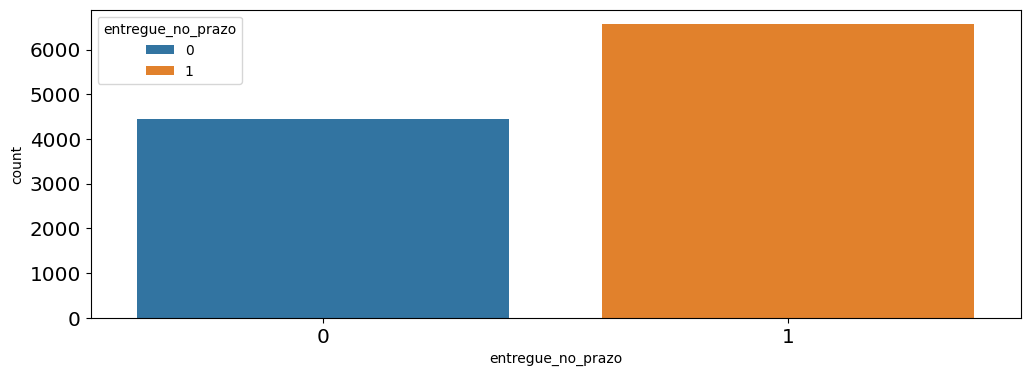

In [17]:
# Count Plot da variável target
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo');

> 📌 **Observações a partir dos gráficos de variáveis categóricas**
>
>- A maioria dos produtos enviados vieram do **corredor F**.
>- O **modo de envio por navio** é o mais frequente entre os registros.
>- Há **poucos produtos com prioridade alta de entrega**, indicando baixa urgência média.
>- A proporção de clientes do sexo **masculino e feminino é praticamente equivalente**.
>- A variável `entregue_no_prazo` é **binária**, portanto, **não requer análise aprofundada da forma da distribuição**.

### 🔗 2.8 Análise Bivariada – Mapa de Correlação

Nesta etapa, visualiza-se a **correlação entre as variáveis numéricas** do dataset por meio de um **heatmap**.

A matriz de correlação fornece uma medida de associação linear entre as variáveis, com valores variando entre:

- `+1`: correlação positiva perfeita  
- `0`: ausência de correlação linear  
- `-1`: correlação negativa perfeita

> 🔍 A análise da matriz auxilia na **identificação de relações significativas** entre variáveis numéricas, o que pode ser útil para seleção de atributos em etapas posteriores.


In [18]:
df[num_cols].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [19]:
corr_df = df[num_cols].corr()

<Axes: >

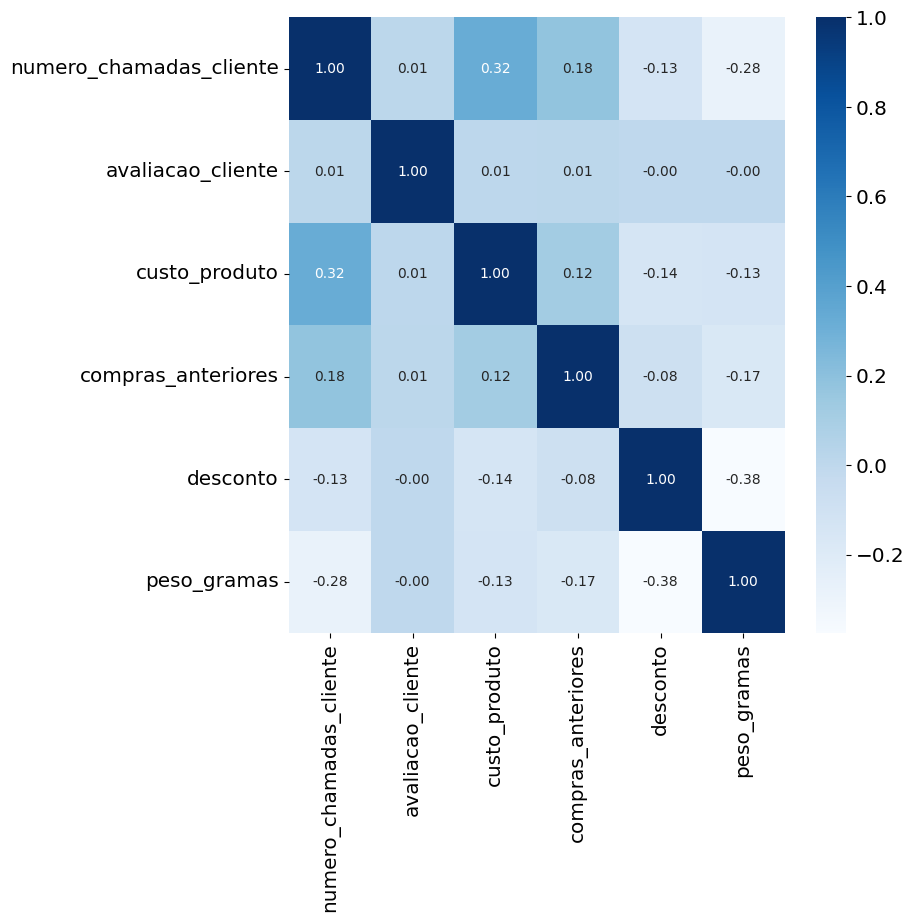

In [20]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[num_cols].corr(),cmap = 'Blues', annot = True, fmt = '.2f')

> ✅ **Observações a partir do Mapa de Correlação**

- Existe uma **correlação positiva** entre `numero_chamadas_cliente` e `custo_produto`, sugerindo que clientes com produtos mais caros tendem a entrar mais em contato.
- Também há correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`, o que pode indicar que clientes com histórico de compras demandam mais suporte.
- Observa-se uma **correlação negativa** entre `desconto` e `peso_gramas`, sugerindo que produtos mais pesados tendem a receber menos desconto.
- As demais variáveis apresentam **correlação fraca**, sem relações lineares marcantes.

ℹ️ **Nota:** correlações são aplicáveis apenas entre variáveis numéricas.  
Para variáveis categóricas, o adequado é investigar **associação** entre grupos (ex: testes de hipótese ou tabelas de contingência).

### 🔁 2.9 Análise Bivariada – Pair Plot

Nesta etapa, utilizaremos o **Pair Plot** da biblioteca `seaborn` para visualizar relações bivariadas entre as variáveis numéricas.  
Esse tipo de gráfico é útil para observar padrões de dispersão, agrupamentos e possíveis correlações entre pares de variáveis, além de permitir a visualização da distribuição univariada em cada diagonal.

A plotagem pode ser aplicada em uma **amostra reduzida** do dataset, com o objetivo de otimizar a performance e a legibilidade dos gráficos.


<Figure size 1500x500 with 0 Axes>

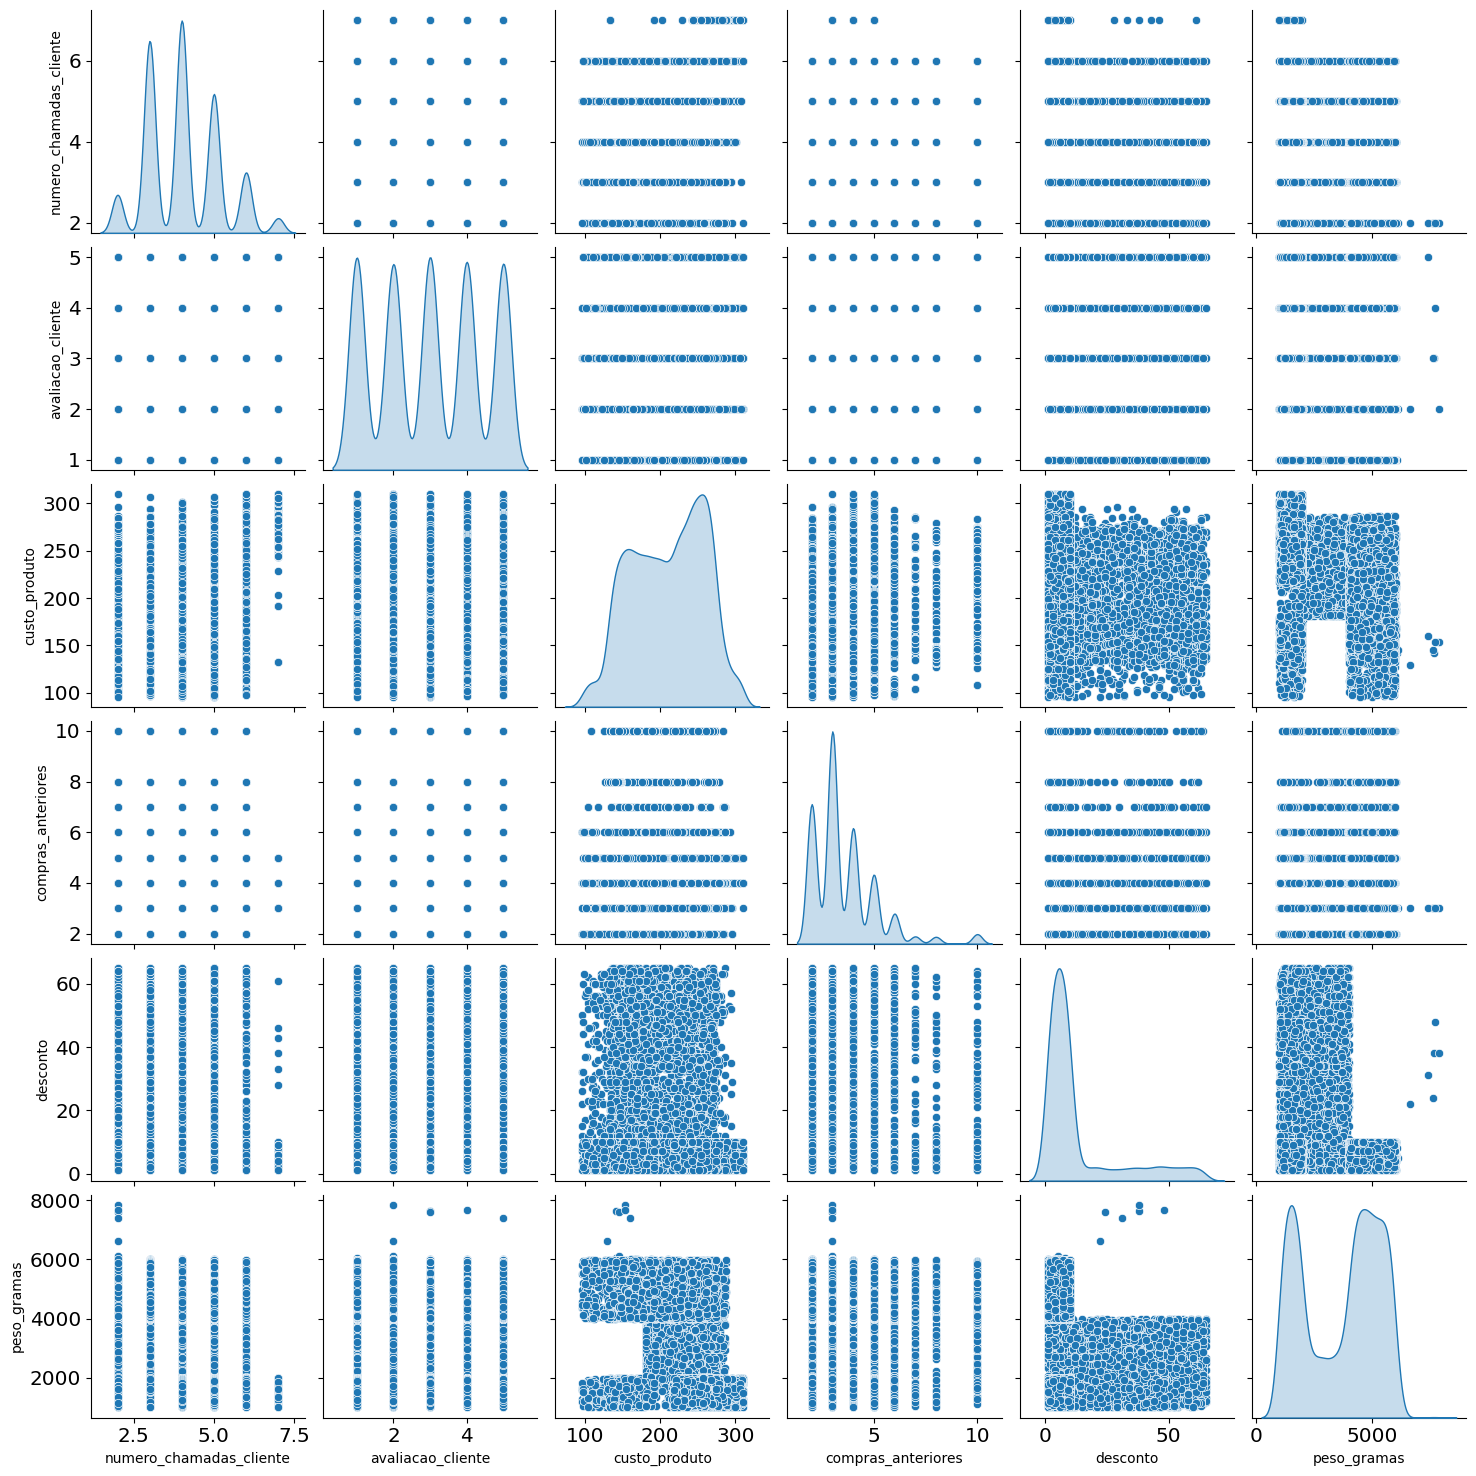

In [21]:
plt.figure(figsize = (15,5))
sns.pairplot(df[num_cols], diag_kind = 'kde')

### 🎯 2.10 Categóricas x Variável-Alvo

Nesta etapa, analisamos como as **variáveis categóricas** se relacionam com a variável-alvo `entregue_no_prazo`.  
O objetivo é verificar **distribuições condicionais** e identificar possíveis padrões ou associações que ajudem a explicar os atrasos nas entregas.

Serão utilizados **gráficos de barras com segmentação por cor (hue)**, permitindo a visualização da proporção de entregas feitas dentro ou fora do prazo para cada categoria.

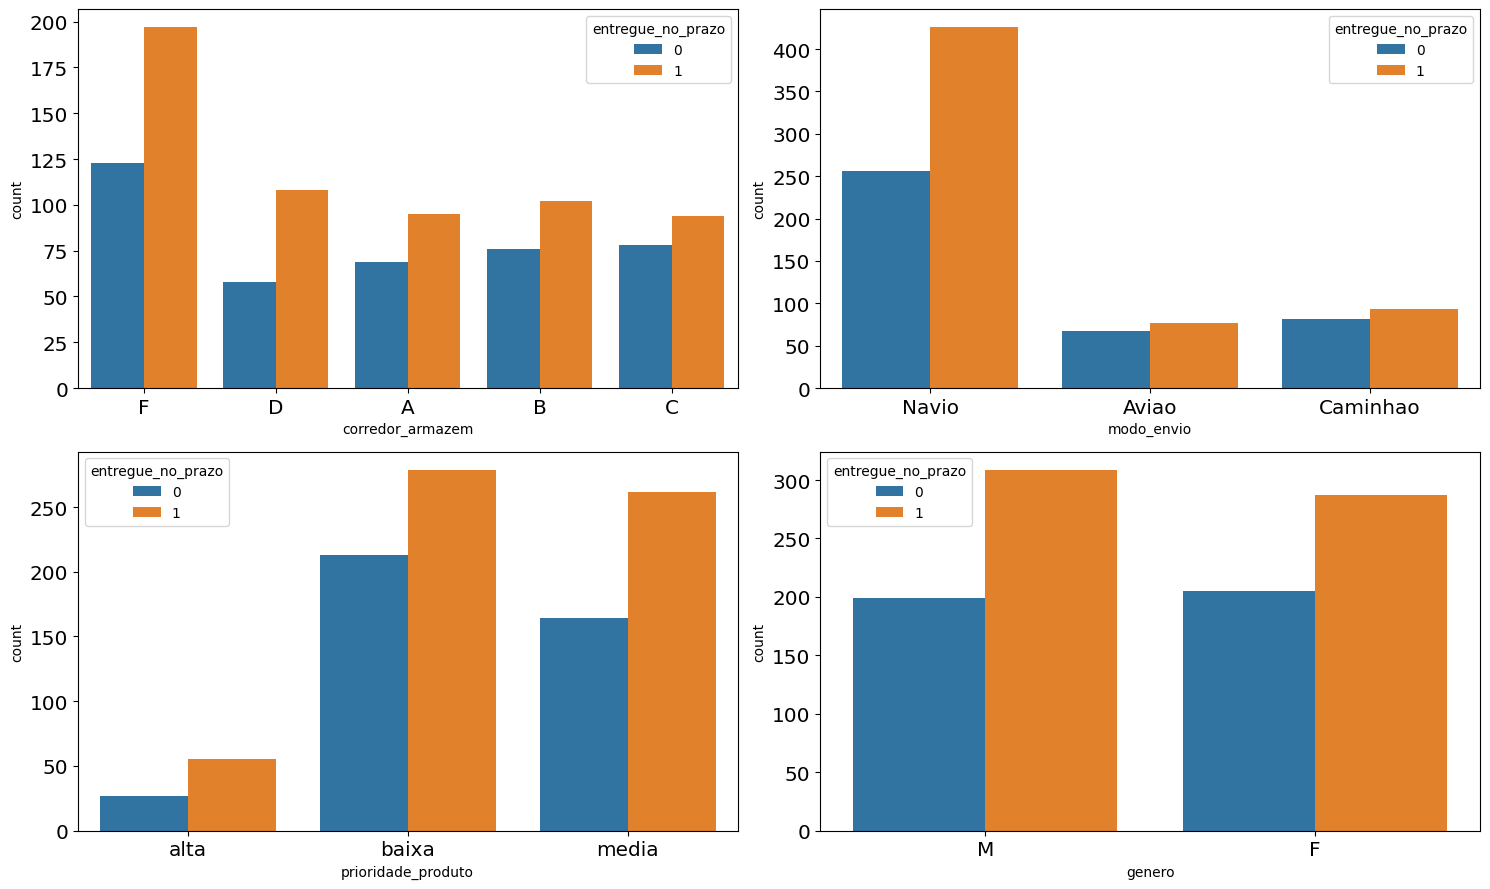

In [22]:
plt.figure(figsize = (15, 9))
features = cat_cols
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

> 📌 **Observações:**
>
>- O modo de envio **Navio** apresenta maior proporção de entregas com atraso.
>- As categorias de **prioridade baixa e média** concentram a maior parte dos atrasos.
>- Produtos armazenados no **corredor F** tendem a ter mais ocorrências de atraso.
>- Compras realizadas por **clientes do sexo feminino** possuem uma leve predominância de entregas fora do prazo.

### ✅ Conclusão da Análise Exploratória (EDA)

A partir da análise realizada, podemos destacar os seguintes pontos:

- Os dados são **consistentes** e não apresentam falhas ou valores ausentes significativos.
- Algumas variáveis numéricas possuem **distribuições assimétricas**, o que deve ser considerado em etapas futuras, principalmente se forem utilizados modelos que assumem normalidade.
- Não foram identificados indícios de **multicolinearidade** entre as variáveis numéricas.
- Alguns atributos parecem **não ter relação direta com a variável alvo**, o que poderá influenciar na seleção de features.
- Entre as variáveis categóricas, destacam-se como potencialmente relevantes para prever atrasos:
  - `modo_envio`
  - `corredor_armazem`
  - `importancia_produto`

## 📈 Etapa 2 – Análise Guiada por Perguntas de Negócio

Nesta etapa, o foco é responder a **questões-chave do negócio** relacionadas ao problema central de **atrasos nas entregas**.

A proposta é identificar padrões e discrepâncias que possam orientar **decisões operacionais, logísticas** ou de **relacionamento com o cliente**, a partir da análise da variável-alvo `entregue_no_prazo` em relação a outras variáveis categóricas.

As investigações são conduzidas por meio de **tabelas percentuais** e **gráficos comparativos**, facilitando a visualização de diferenças relevantes entre grupos e possíveis causas para os atrasos observados.


#### 🔧 Função 01 – Tabela de Percentual por Categoria

Gera uma tabela com as seguintes informações, segmentadas por uma variável categórica de interesse e pela variável-alvo `entregue_no_prazo`:

- Total de registros por categoria e status de entrega;
- Total geral por categoria;
- Percentual de entregas no prazo e fora do prazo para cada grupo.

Essa tabela serve como base de apoio numérico para a análise visual e permite interpretar **proporções relativas** com mais precisão.


In [23]:
def gera_tabela_percentual(df, target_col, cat_col, id_col='ID'):
    # Agrupando por categoria e target para obter o total
    df_group = df.groupby([target_col, cat_col])[id_col].nunique().reset_index(name='Total Por Categoria')

    # Total por categoria (independente do status)
    df_group['Total Geral'] = df_group.groupby(cat_col)['Total Por Categoria'].transform('sum')

    # Percentual em relação ao total da categoria
    df_group['Percentual(%)'] = (df_group['Total Por Categoria'] / df_group['Total Geral'] * 100).round(2)

    # Renomeando para manter padrão
    df_group.columns = ['Status de Entrega no Prazo', 'Categoria', 'Total Por Categoria', 'Total Geral', 'Percentual(%)']
    
    return df_group

#### 📊 Função 02 – Gráfico de Entregas por Categoria (Absoluto)

Plota um gráfico de barras agrupadas, com o total de entregas por categoria da variável de interesse, segmentadas pela variável-alvo `entregue_no_prazo`.

Permite observar **o volume bruto** de entregas por grupo, auxiliando na identificação de concentrações ou desequilíbrios operacionais.


In [24]:
def grafico_absoluto(df, coluna_categoria, target='entregue_no_prazo'):
    """
    Plota o gráfico de contagem absoluta cruzando uma variável categórica com o target.
    Retorna uma tabela de frequência absoluta.
    """
    # Gráfico
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=coluna_categoria, hue=target, palette='Set2')
    plt.title(f'Total de Entregas por {coluna_categoria}', fontsize=16)
    plt.xlabel(coluna_categoria)
    plt.ylabel('Total')
    plt.legend(title='Entregue no Prazo')
    plt.tight_layout()
    plt.show()

#### 📉 Função 03 – Gráfico de Entregas por Categoria (Percentual)

Plota um gráfico de barras comparando os **percentuais de entregas** (no prazo vs. fora do prazo) por categoria da variável analisada.

Essa visualização evidencia **discrepâncias relativas**, mesmo em grupos com tamanhos diferentes, sendo útil para identificar padrões de atraso com base na proporção.

In [25]:
def grafico_percentual(df, coluna_categoria, target='entregue_no_prazo'):
    """
    Plota o gráfico de percentuais cruzando uma variável categórica com o target.
    A tabela de frequência é gerada internamente, mas não é retornada.
    """
    freq = (
        df.groupby([coluna_categoria, target])
        .size()
        .reset_index(name='count')
    )
    total = df.groupby(coluna_categoria).size().reset_index(name='total')
    freq = freq.merge(total, on=coluna_categoria)
    freq['Percentual (%)'] = 100 * freq['count'] / freq['total']

    # Gráfico
    plt.figure(figsize=(12,6))
    sns.barplot(data=freq, x=coluna_categoria, y='Percentual (%)', hue=target, palette='Set2')
    plt.title(f'Percentual de Entregas por {coluna_categoria}', fontsize=16)
    plt.xlabel(coluna_categoria)
    plt.ylabel('Percentual (%)')
    plt.legend(title='Entregue no Prazo')
    plt.tight_layout()
    plt.show()

    # ❌ Não retorna a tabela
    return None


### 📦 2.1 Entregas atrasadas estão igualmente distribuídas pelos modos de envio?

O objetivo aqui é verificar se existe diferença no percentual de entregas **fora do prazo** entre os diferentes **modos de envio** (`Navio`, `Caminhão`, `Avião`).

A análise será feita em três frentes:
- **Tabela percentual** com proporção de entregas dentro e fora do prazo por tipo de transporte;
- **Gráfico de barras (absoluto)** com total de entregas por status e modal logístico;
- **Gráfico de barras (percentual)** para avaliar a influência relativa do modo de envio nos atrasos.

Essa abordagem ajuda a identificar se o tipo de transporte influencia diretamente na ocorrência de atrasos logísticos.

In [26]:
# 🔹 Gera tabela com o percentual de entregas no prazo e fora do prazo por modo de envio
gera_tabela_percentual(df, 'entregue_no_prazo', 'modo_envio')

,Status de Entrega no Prazo,Categoria,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.84
1,0,Caminhao,725,1760,41.19
2,0,Navio,3004,7463,40.25
3,1,Aviao,1069,1777,60.16
4,1,Caminhao,1035,1760,58.81
5,1,Navio,4459,7463,59.75


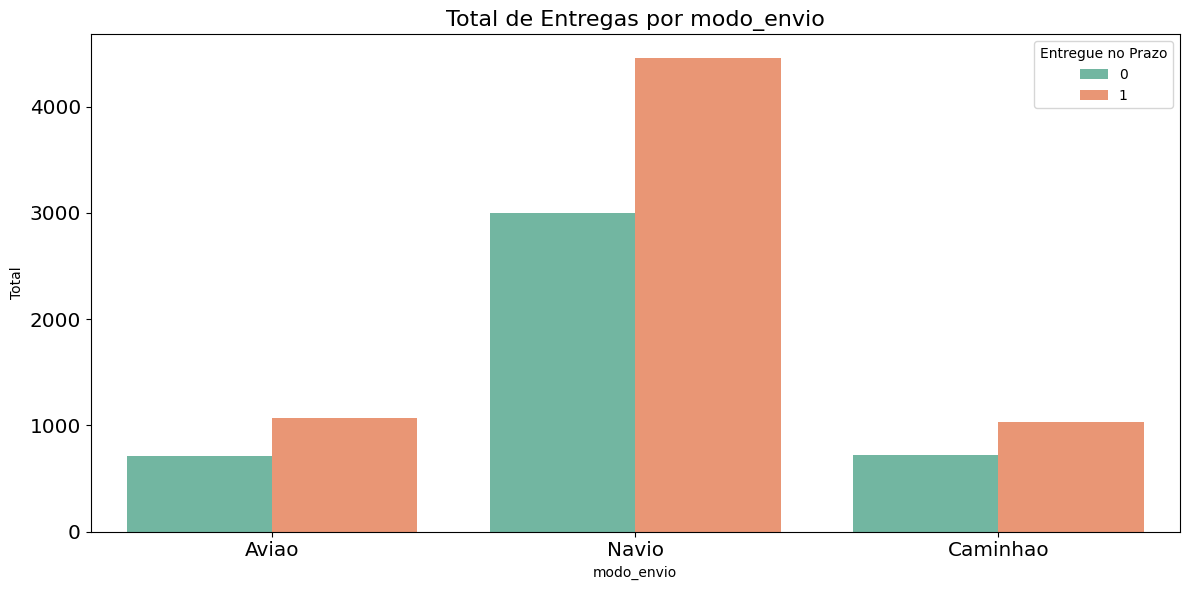

In [27]:
# 🔹 Gráfico de barras com o total absoluto de entregas por modo de envio
grafico_absoluto(df, 'modo_envio')

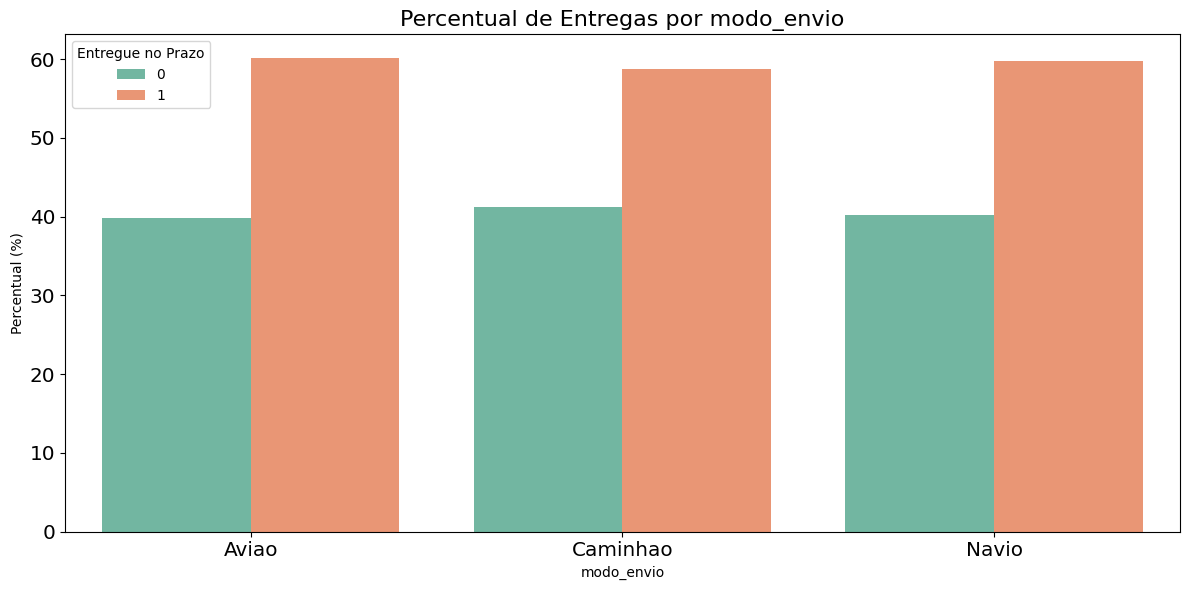

In [28]:
# 🔹 Gráfico de barras com o percentual de entregas por modo de envio
grafico_percentual(df, 'modo_envio')

### 🚚 A prioridade do produto impacta na pontualidade da entrega?

Aqui buscamos entender se há diferença relevante nos atrasos de entrega conforme a **prioridade atribuída ao produto** (`alta`, `média`, `baixa`).

A estrutura da análise repete a lógica da pergunta anterior:
- **Tabela percentual** com a relação entre prioridade e status da entrega;
- **Gráfico de barras (absoluto)** comparando o volume de entregas por categoria de prioridade;
- **Gráfico de barras (percentual)** mostrando se há aumento proporcional de atrasos em alguma prioridade específica.

Esse cruzamento é útil para avaliar se a definição de prioridade está sendo efetivamente respeitada no processo logístico.

In [29]:
# 🔹 Tabela de percentuais por nível de prioridade do produto
gera_tabela_percentual(df, 'entregue_no_prazo', 'prioridade_produto')

,Status de Entrega no Prazo,Categoria,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.02
1,0,baixa,2158,5298,40.73
2,0,media,1947,4754,40.95
3,1,alta,616,948,64.98
4,1,baixa,3140,5298,59.27
5,1,media,2807,4754,59.05


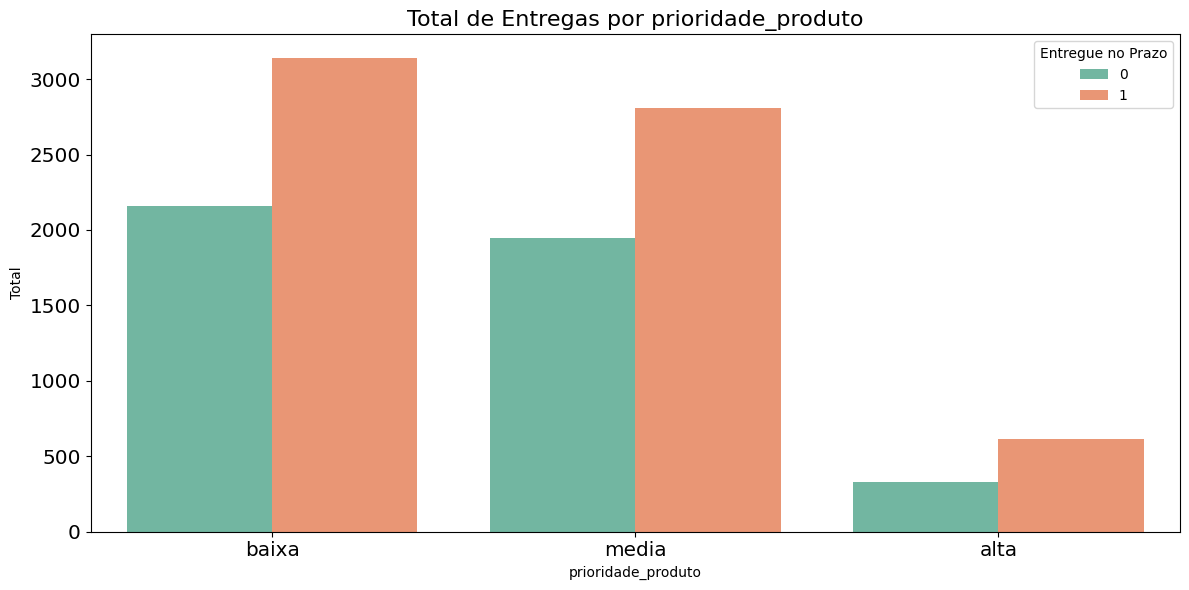

In [30]:
# 🔹 Gráfico de volume absoluto por nível de prioridade
grafico_absoluto(df, 'prioridade_produto')

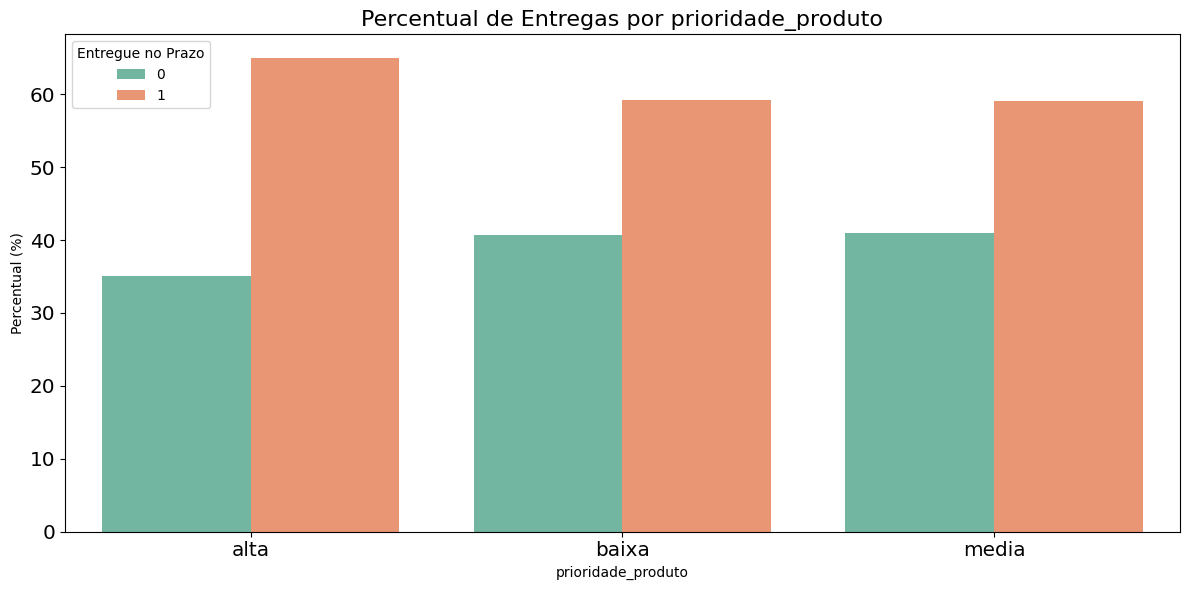

In [31]:
# 🔹 Gráfico percentual por prioridade do produto
grafico_percentual(df, 'prioridade_produto')

### 🏷️ Existem corredores no armazém com maior incidência de atrasos?

O objetivo nesta etapa é verificar se o local de armazenamento interno — representado pela variável `corredor_armazem` — apresenta **diferenças relevantes na taxa de entrega no prazo**.

Será feita a análise por:
- **Tabela percentual** com proporções de atraso por corredor;
- **Gráfico de barras (absoluto)** com o total de entregas por corredor;
- **Gráfico de barras (percentual)** para visualizar padrões relativos.

Essa análise pode indicar gargalos logísticos ou problemas operacionais associados a determinadas regiões do armazém.

In [32]:
# 🔹 Tabela com a proporção de entregas por corredor do armazém
gera_tabela_percentual(df, 'entregue_no_prazo','corredor_armazem')

,Status de Entrega no Prazo,Categoria,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.35
1,0,B,729,1833,39.77
2,0,C,740,1834,40.35
3,0,D,738,1834,40.24
4,0,F,1472,3666,40.15
5,1,A,1075,1833,58.65
6,1,B,1104,1833,60.23
7,1,C,1094,1834,59.65
8,1,D,1096,1834,59.76
9,1,F,2194,3666,59.85


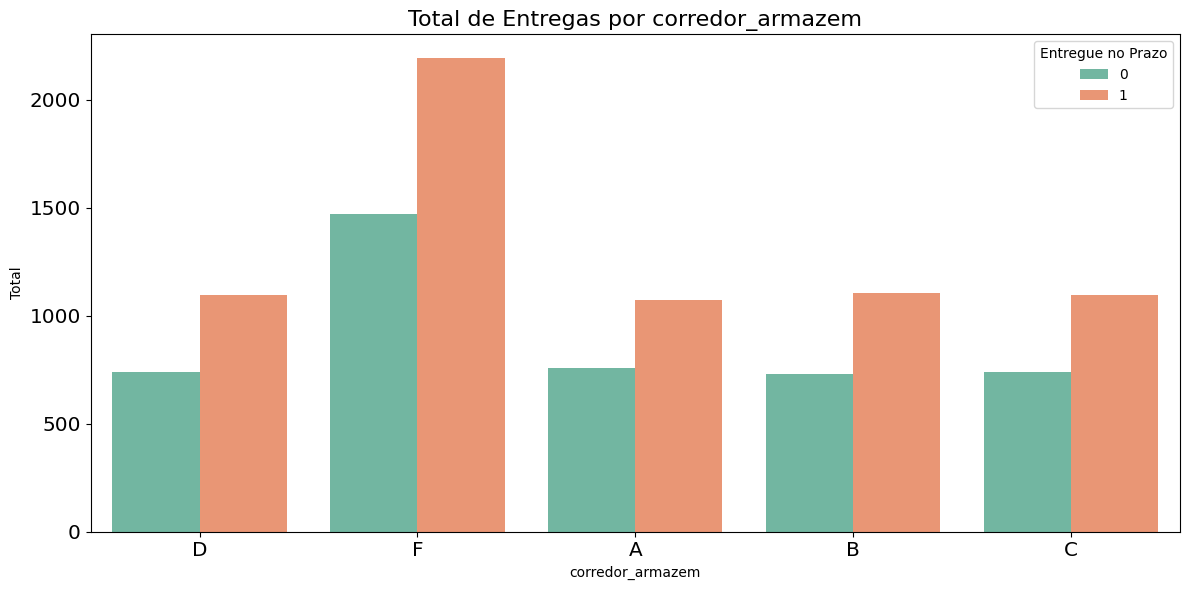

In [33]:
# 🔹 Gráfico absoluto por corredor do armazém
grafico_absoluto(df, 'corredor_armazem')

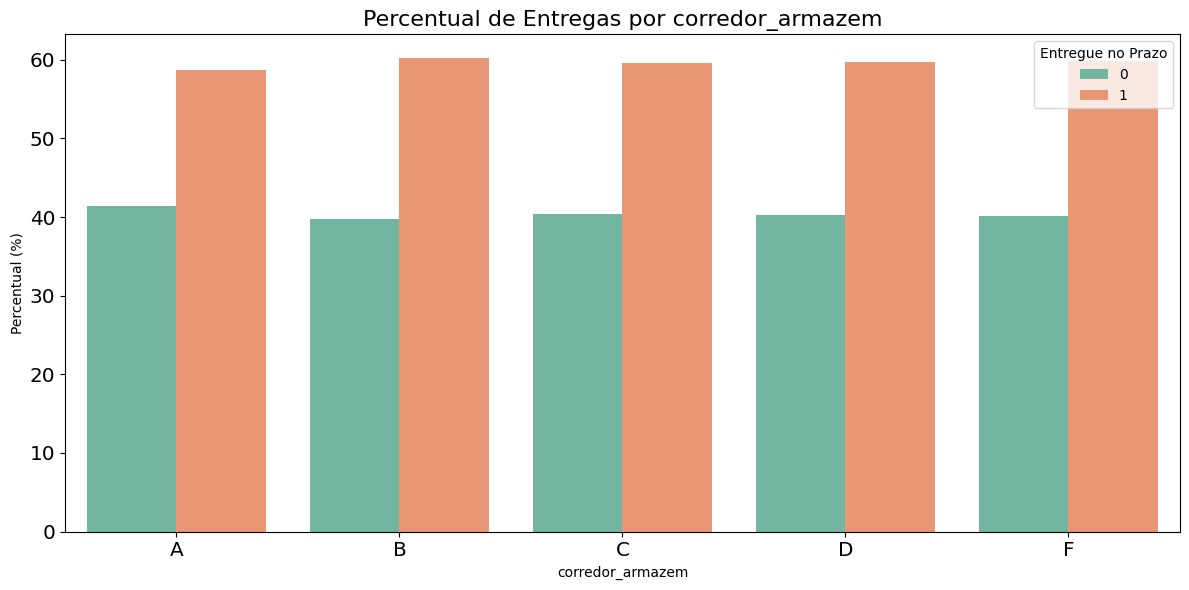

In [34]:
# 🔹 Gráfico percentual por corredor do armazém
grafico_percentual(df, 'corredor_armazem')

## ✅ Conclusão Geral da Análise Exploratória

Nesta análise exploratória de dados (EDA), conduzimos uma investigação detalhada sobre os principais fatores relacionados ao **atraso nas entregas** em um processo logístico de e-commerce.

Entre os principais **achados** e **insights** extraídos, destacam-se:

- 🔹 Algumas variáveis numéricas apresentam **distribuições assimétricas**, o que pode impactar métodos estatísticos mais sensíveis à normalidade.
- 🔹 Variáveis como `modo_envio`, `corredor_armazem` e `prioridade_produto` demonstraram **potencial explicativo** em relação à variável-alvo `entregue_no_prazo`.
- 🔹 Foi observada uma **correlação negativa** entre `desconto` e `peso_gramas`, e uma **correlação positiva** entre `numero_chamadas_cliente` e outras variáveis operacionais.
- 🔹 A variável-alvo (`entregue_no_prazo`) **não está uniformemente distribuída** entre categorias como `modo_envio` e `prioridade_produto`, o que levanta hipóteses causais relevantes para serem testadas posteriormente.

A estrutura adotada neste notebook permitiu:

- A separação clara entre variáveis numéricas e categóricas;
- A exploração univariada e bivariada com foco em padrões visuais;
- O uso de perguntas de negócio para guiar a análise e gerar valor prático.

---

🎯 **Próximos passos recomendados:**
- Aplicação de testes estatísticos formais (inferência) para validar as hipóteses levantadas.
- Implementação de rotinas de *Feature Engineering* e preparação de dados para modelagem preditiva.


## 🧾 Versões dos Pacotes Utilizados

Este notebook foi executado com as seguintes versões de bibliotecas Python:

In [35]:
# 📦 Versões dos pacotes usados neste Lab
%reload_ext watermark
%watermark -a "Small Data Lab" --python --iversions

Author: Small Data Lab

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.37.0

numpy     : 2.2.6
matplotlib: 3.10.3
pandas    : 2.3.0
seaborn   : 0.13.2

